In [359]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_csv_dataset,load_traffic_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap, imd_1d_smap
import importlib
importlib.reload(imd_nd_smap)

<module 'manifold_learning.imd_nd_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_nd_smap.py'>

In [2075]:
# Load traffic dataset
X = load_traffic_dataset()
page_names = X["Page"].to_numpy().astype("str")
X = X[X.columns[1:]]

df = X.T

# Interpolate missing values
df_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)

# Fill any remaining missing values with zeros
df_filled = df_interpolated.fillna(0)
X = df_filled.to_numpy().astype(np.float32)


X = np.log(X+1)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
page_names = page_names[X.mean(axis=0) != 0]
X = X[:,X.mean(axis=0) != 0]
X = (X-X.mean(axis=0))/X.std(axis=0)

mask = (np.count_nonzero(np.diff(X[:,:],axis=0),axis=0) > 750)
X = X[:,mask]
page_names = page_names[mask]
observables = StandardScaler().fit_transform(X)

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [240]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [241]:
observables = utils.get_td_embedding_np(X,30,1).reshape(-1,30*X.shape[1])

In [347]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])

observables = StandardScaler().fit_transform(X)

In [4]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [5]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [2197]:
observables = observables @ np.random.normal(0,1,(180,180))

In [348]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=2,subtract_corr=True, device="cuda")


In [349]:
trainer.fit(observables, sample_len=100, library_len=1000, 
            exclusion_rad=90, omega=4, tp=90, 
            epochs=1000, num_batches=32, optimizer="Adagrad", learning_rate=0.1, tp_policy="range")


Epoch 1/1000, Loss: 1.2546
Epoch 2/1000, Loss: 1.5187
Epoch 3/1000, Loss: 1.3778
Epoch 4/1000, Loss: 1.3365
Epoch 5/1000, Loss: 1.2827
Epoch 6/1000, Loss: 1.2648
Epoch 7/1000, Loss: 1.2598
Epoch 8/1000, Loss: 1.2310
Epoch 9/1000, Loss: 1.1130
Epoch 10/1000, Loss: 1.1724
Epoch 11/1000, Loss: 1.0074
Epoch 12/1000, Loss: 1.1027
Epoch 13/1000, Loss: 0.9372
Epoch 14/1000, Loss: 1.0266
Epoch 15/1000, Loss: 1.1241
Epoch 16/1000, Loss: 0.9318
Epoch 17/1000, Loss: 0.9915
Epoch 18/1000, Loss: 0.8873
Epoch 19/1000, Loss: 0.8745
Epoch 20/1000, Loss: 0.8551
Epoch 21/1000, Loss: 0.8698
Epoch 22/1000, Loss: 0.8342
Epoch 23/1000, Loss: 0.8381
Epoch 24/1000, Loss: 0.8070
Epoch 25/1000, Loss: 0.7862
Epoch 26/1000, Loss: 0.7830
Epoch 27/1000, Loss: 0.7896
Epoch 28/1000, Loss: 0.7683
Epoch 29/1000, Loss: 0.7856
Epoch 30/1000, Loss: 0.7554
Epoch 31/1000, Loss: 0.7799
Epoch 32/1000, Loss: 0.7993
Epoch 33/1000, Loss: 0.8836
Epoch 34/1000, Loss: 0.8050
Epoch 35/1000, Loss: 0.7922
Epoch 36/1000, Loss: 0.7436
E

In [378]:
trainer = imd_1d_smap.IMD_1D_smap(observables.shape[1], n_components=3,subtract_corr=True, device="cuda")



In [414]:
trainer.fit(observables, embed_dim=3,embed_lag=30,sample_len=100, library_len=1000, 
            exclusion_rad=90, omega=4, tp=90, 
            epochs=1000, num_batches=32, optimizer="Adagrad", learning_rate=0.1, tp_policy="range")

Epoch 1/1000, Loss: 0.6658
Epoch 2/1000, Loss: 0.6837
Epoch 3/1000, Loss: 0.6768
Epoch 4/1000, Loss: 0.6694
Epoch 5/1000, Loss: 0.6666
Epoch 6/1000, Loss: 0.6525
Epoch 7/1000, Loss: 0.6630
Epoch 8/1000, Loss: 0.6789
Epoch 9/1000, Loss: 0.6768
Epoch 10/1000, Loss: 0.6962
Epoch 11/1000, Loss: 0.6654
Epoch 12/1000, Loss: 0.6705
Epoch 13/1000, Loss: 0.6856
Epoch 14/1000, Loss: 0.6629
Epoch 15/1000, Loss: 0.6613
Epoch 16/1000, Loss: 0.6539
Epoch 17/1000, Loss: 0.6726
Epoch 18/1000, Loss: 0.6635
Epoch 19/1000, Loss: 0.6732


KeyboardInterrupt: 

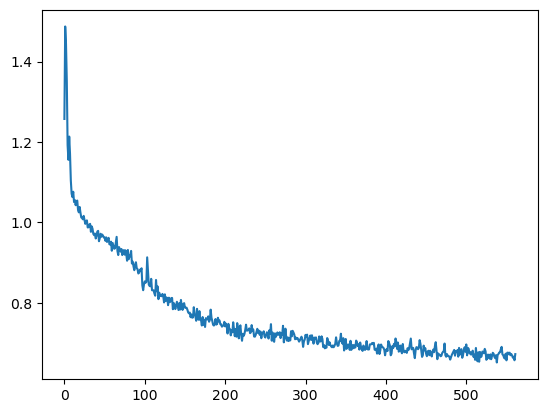

In [390]:
plt.plot(trainer.get_loss_history()[:])


In [407]:
import torch
unmixed = utils.get_td_embedding_torch(torch.Tensor(unmixed),4,10).squeeze().numpy()

In [391]:

unmixed = trainer.predict(observables)

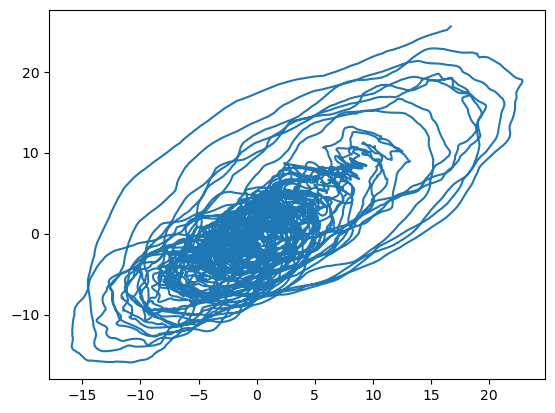

In [408]:
plt.plot(unmixed[30:,0,0],unmixed[:-30,0,0])

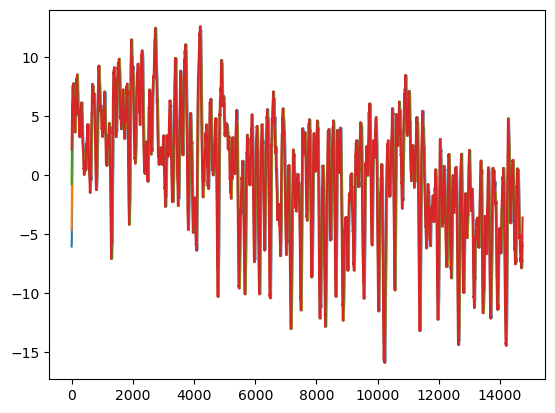

In [409]:

plt.plot(unmixed[:,2,:])
#plt.xlim(0,2000)

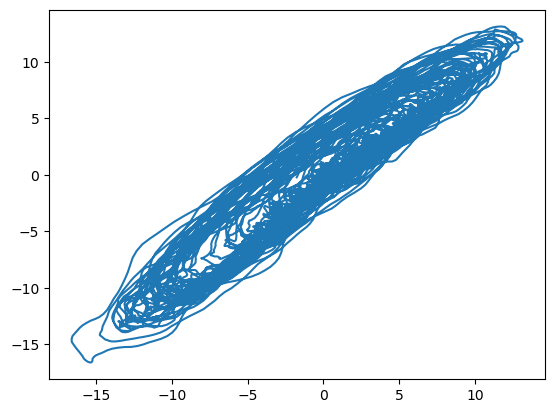

In [410]:
plt.plot(unmixed[:,1,1], unmixed[:,1,0])

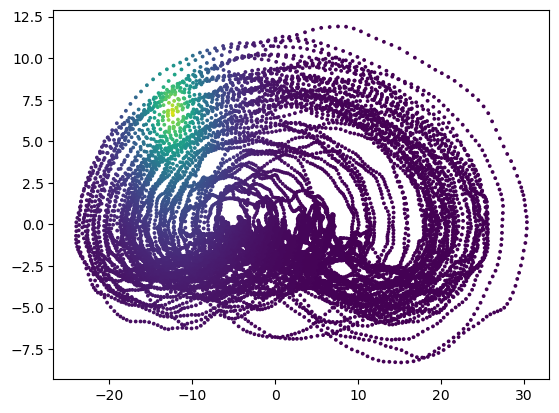

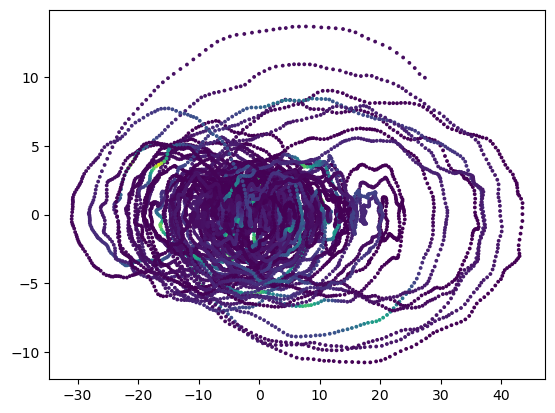

In [411]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(unmixed[:,1][[3150]],unmixed[:,1])[0]
weights = np.exp(-(4*dist/dist.mean()))

x_pca = PCA(2).fit_transform(unmixed[:,1,:])
plt.scatter(x_pca[:-20,0],x_pca[:-20,1],c=weights[:-20],s=3)
plt.show()

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[20:,0],x_pca[20:,1],c=weights[:-20],s=3)

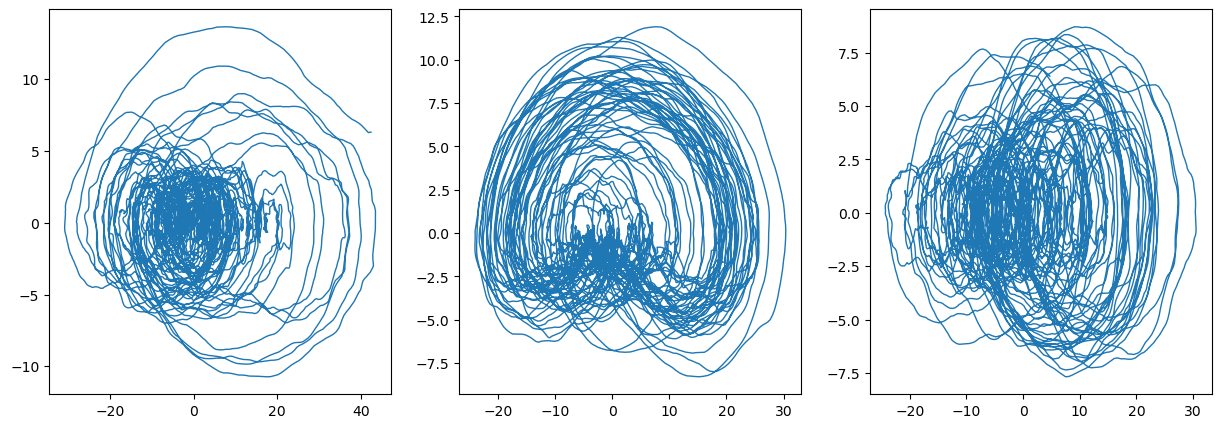

In [412]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

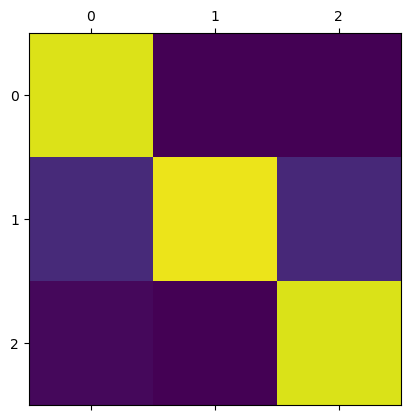

In [413]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,30,30,False).mean(axis=0),vmin=0,vmax=1)

In [358]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,0,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [345]:
fig = px.line_3d(x=unmixed[:,0,0], y=unmixed[:,0,1],z=unmixed[:,0,2],height=700)

fig.show()